In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df =pd.read_csv('/Users/lukeopany/Documents/food delivery time/Food_Delivery_Times.csv')

In [5]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.shape

(1000, 9)

In [11]:
df['Courier_Experience_yrs'].value_counts()

Courier_Experience_yrs
6.0    109
9.0    108
1.0    107
8.0    101
2.0     99
4.0     94
7.0     91
0.0     91
5.0     90
3.0     80
Name: count, dtype: int64

In [8]:
missing_mask = df.isnull().any(axis=1)

In [ ]:
df[missing_mask]

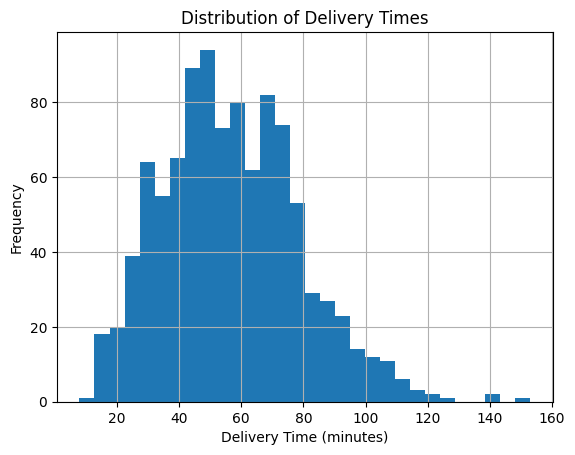

In [12]:
df['Delivery_Time_min'].hist(bins=30)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times')
plt.show()

Correlation between Delivery Time and Courier Experience: -0.090


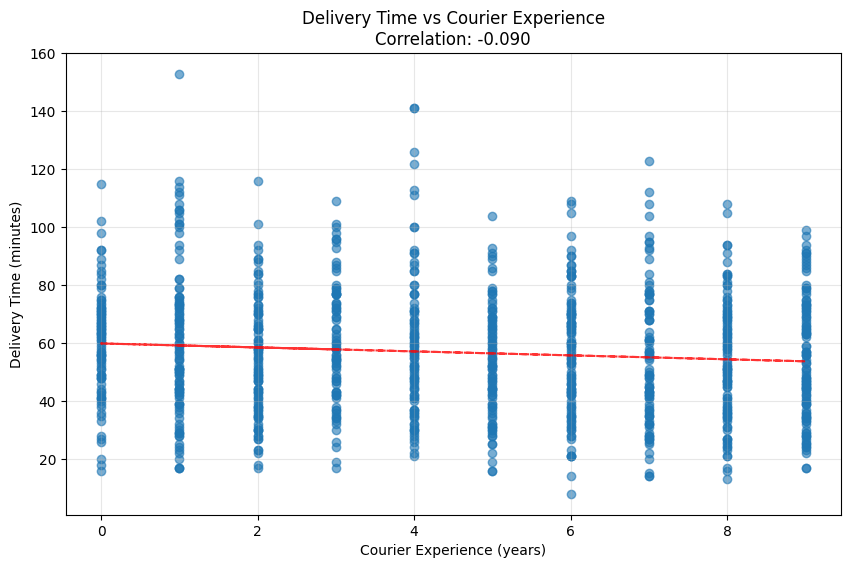

<Figure size 1200x600 with 0 Axes>

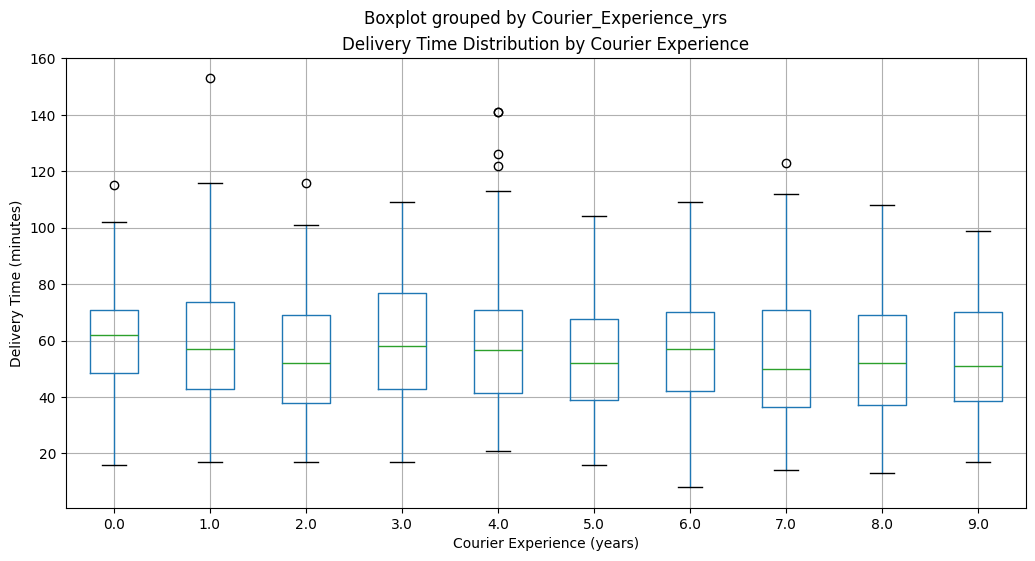

In [13]:
# Remove missing values for correlation analysis
clean_data = df[['Delivery_Time_min', 'Courier_Experience_yrs']].dropna()

# Calculate correlation coefficient
correlation = clean_data['Delivery_Time_min'].corr(clean_data['Courier_Experience_yrs'])
print(f"Correlation between Delivery Time and Courier Experience: {correlation:.3f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], alpha=0.6)
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (minutes)')
plt.title(f'Delivery Time vs Courier Experience\nCorrelation: {correlation:.3f}')

# Add trend line
z = np.polyfit(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], 1)
p = np.poly1d(z)
plt.plot(clean_data['Courier_Experience_yrs'], p(clean_data['Courier_Experience_yrs']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

# Group by experience levels for boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='Delivery_Time_min', by='Courier_Experience_yrs', figsize=(12, 6))
plt.title('Delivery Time Distribution by Courier Experience')
plt.xlabel('Courier Experience (years)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [15]:
# This calculates a linear regression line
z = np.polyfit(clean_data['Courier_Experience_yrs'], clean_data['Delivery_Time_min'], 1)
p = np.poly1d(z)
# If z[0] (slope) is negative, line slopes downward

In [18]:
print("Time of Day categories:")
print(df['Time_of_Day'].value_counts())

Time of Day categories:
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

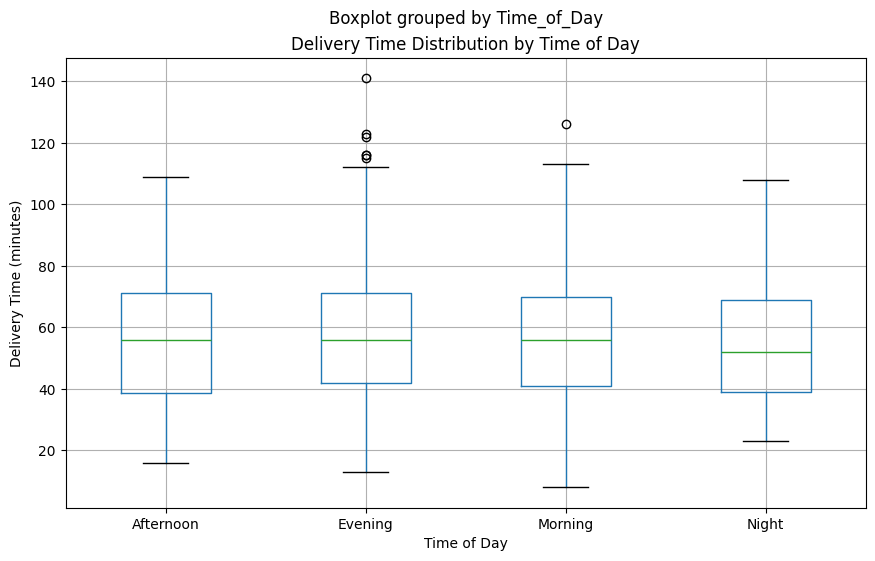

In [19]:
#boxplot to visualize delivery times across different times of day
plt.figure(figsize=(10, 6))
df.boxplot(column='Delivery_Time_min', by='Time_of_Day', figsize=(10, 6))
plt.title('Delivery Time Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (minutes)')
plt.show()

In [21]:
df['Weather'].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [23]:
df['Weather'].value_counts(normalize=True) * 100


Weather
Clear    48.453608
Rainy    21.030928
Foggy    10.618557
Snowy    10.000000
Windy     9.896907
Name: proportion, dtype: float64